监督学习：

监督机器学习问题分为两种：分类classification和回归regression

In [5]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import  matplotlib.pyplot as plt

%matplotlib inline

In [6]:
pd.options.display.max_rows = 10

In [7]:
import sklearn
import mglearn
from sklearn.model_selection import train_test_split

泛化、过拟合和欠拟合

* 在监督学习中，用户想要在训练数据上构建模型，然后能够对没见过的新数据（与训练集具有相同的特征）做出准确的预测。
* 若一个模型能够对没见过的数据做出准确预测，称之为能够从训练集*泛化（generalize）*到测试集。
* 构建模型的最终目的就是为了得到一个泛化精度尽可能高的模型。

当拟合模型时过分关注训练集的细节，得到了一个在训练集上表现很好，但不能泛化到新数据上的模型，那么就存在*过拟合*现象；

反之，模型训练的过于简单，无法抓住数据的全部内容及数据中的变化，在训练集上的表现就很差，此种情况较*欠拟合*。

00. 一些样本数据集

X.shape: (26, 2)


C:\Program Files\Python35\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


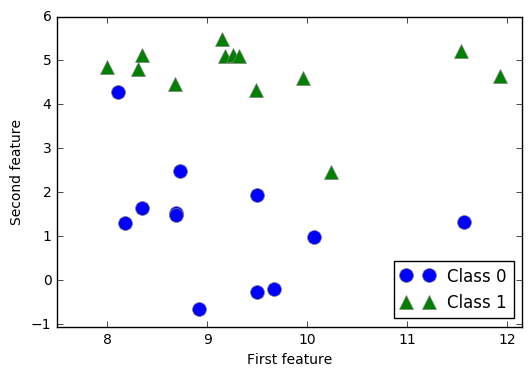

In [9]:
# 生成数据集

X, y = mglearn.datasets.make_forge()

#数据集绘图

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"],loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

# forge数据集的可视化展示

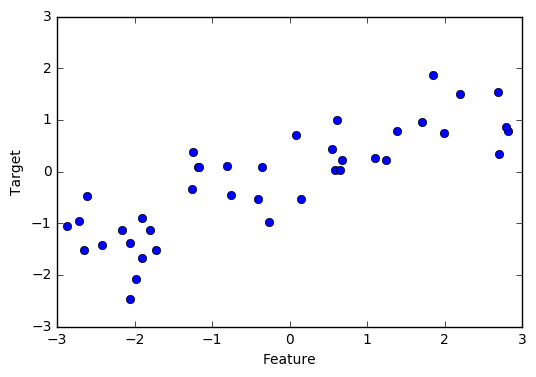

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [11]:
# 威斯康星州乳腺癌数据

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['feature_names', 'target', 'target_names', 'data', 'DESCR'])


sklearn中的Bunch对象与字典数据结构比较相似，可以bunch[['key']]或bunch.key来调用

In [12]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [14]:
#212条记录为恶性，357条为良性

print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [20]:
 # 每一个特征的语义说明
  
print("Feature names:\n{}".format(cancer.feature_names))
print("descriptions: {}".format(cancer.DESCR))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
descriptions: Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (loc

In [17]:
# 波士顿房价数据集

from sklearn.datasets import load_boston

boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [19]:
print("DESCR: {}".format(boston.DESCR))

DESCR: Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town

对于boston房价数据集，输入特征不仅限于这13个测量结果，还包括这些特征之间的成绩（即*交互项*）。

例如，我们不仅可以将犯罪率和公路可达性作为特征，还可以将犯罪率与公路可达性的乘积作为特征，像这样包含导出特征的方法叫做*特征工程*。

In [21]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:: {}".format(X.shape))

X.shape:: (506, 104)


01. k近邻方法

C:\Program Files\Python35\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


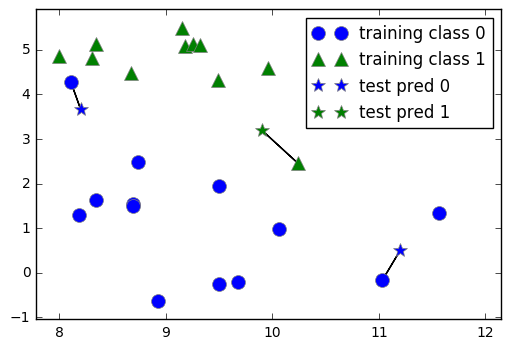

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

上面算的是1个邻居的情况；下面使用k个邻居的情况，并采用投票法来制定标签

对于每一个测试点，计算多少个邻居属于类别0，多少个邻居数据类别1，然后将出现次数更多的类别（也就是k个近邻值汇总占多数的类别）作为分类结果。

C:\Program Files\Python35\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


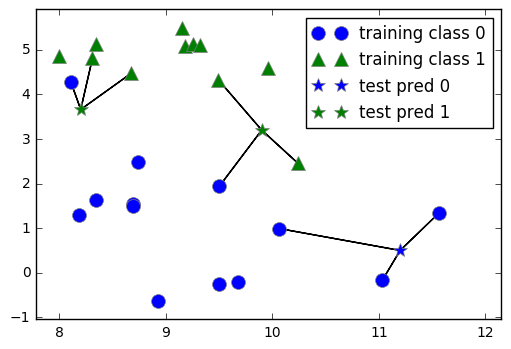

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [28]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Program Files\Python35\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [35]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


最后得到结果精度为86%

1.1 分析KNeighborsClassifier

对于二维数据集，可以在xy平面上画出所有可能的测试点的预测结果。根据平面中每一个点的所属类别对平面进行着色。这样可以查看*决策边界（decision boundary）*

C:\Program Files\Python35\lib\site-packages\numpy\ma\core.py:6462: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Python35\lib\site-packages\numpy\ma\core.py:6462: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


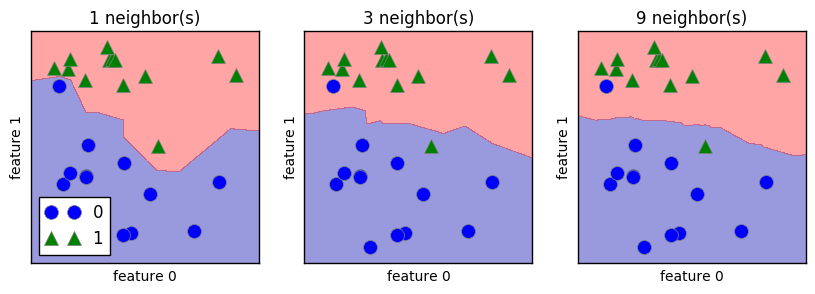

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# 对1个、3个和9个邻居三种情况分别进行决策边界的可视化
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

可以看出，使用单一邻居绘制的决策边界紧跟着训练数据；随着邻居个数越来越多，决策边界也越来越光滑。更光滑的边界对应更简单的模型。

使用更少的邻居对应更高的模型复杂度，而是用更多的邻居对应更低的模型复杂度。

In [38]:
# 下面来讨论一下模型复杂度与泛化能力之间的关系。

from sklearn.datasets import load_breast_cancer

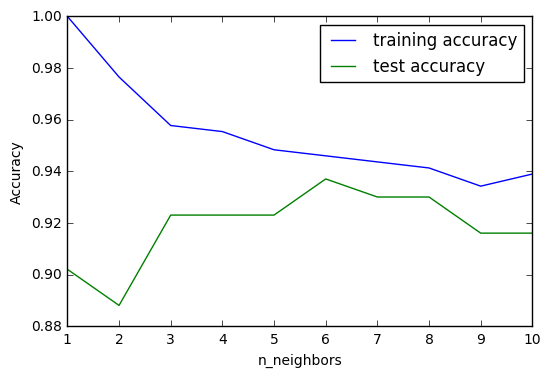

In [40]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# n_neightbors取值从1到10

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 记录训练的精度
    training_accuracy.append(clf.score(X_train, y_train))
    # 记录泛化精度
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


x轴显示的是近邻数，y轴显示训练集精度和测试集精度。单一邻居时的测试集精度比使用更多的邻居时更低，表明单一近邻的模型过于复杂，对结果的解释力度差。

反之，当考虑10个邻居时，模型又过于简单，性能甚至变得更差。

1.2 k近邻回归

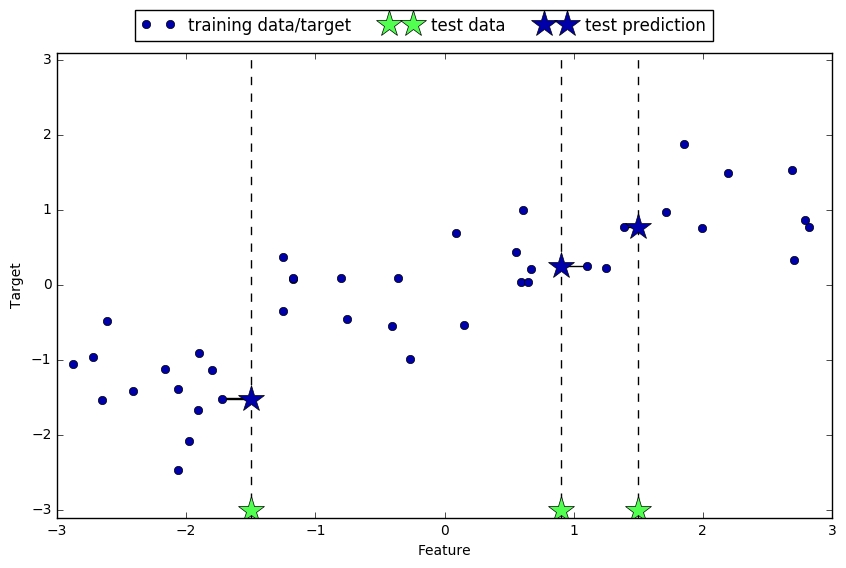

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __repr__(self, /)
 |      Return repr(self).



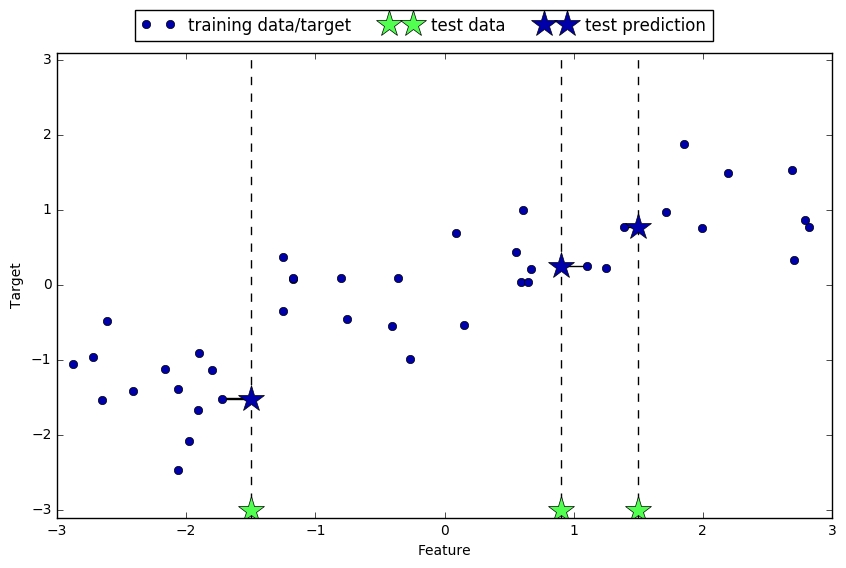

In [43]:
help(mglearn.plots.plot_knn_regression())

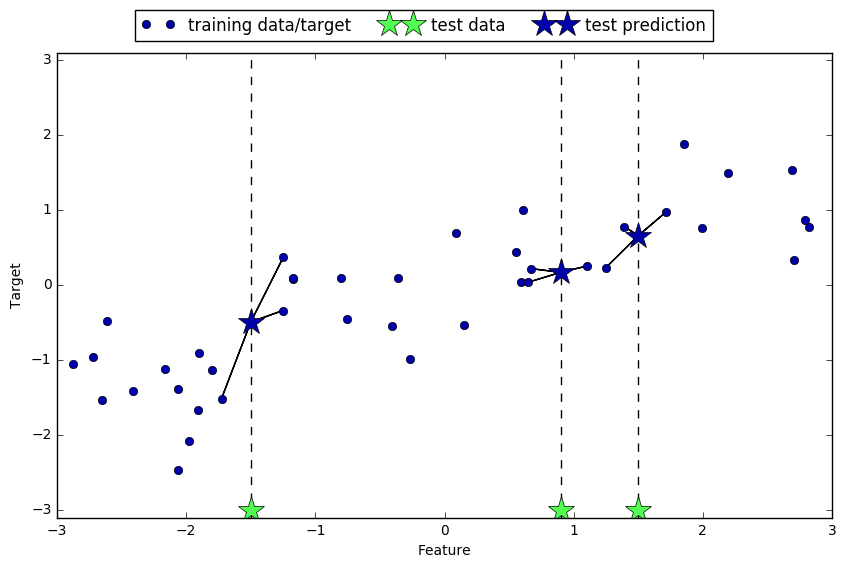

In [56]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [46]:
from sklearn.neighbors import KNeighborRegressor

In [48]:
X, y = mglearn.datasets.make_wave(n_samples=40)

# 将wave数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 模型实例化，并将邻居个数设为3
reg = KNeighborsRegressor(n_neighbors=3)
# 利用训练数据和训练结果来拟合模型
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [49]:
print("Test set prediction:\n{}".format(reg.predict(X_test)))

Test set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [50]:
# 回归问题一般用R^2来进行评估，别成为回归系数或者决定系数。

In [51]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


1.3 分析KNeighborsRegressor

cm2和cm3是mglearn库中内置的配色方案，可以直接调用

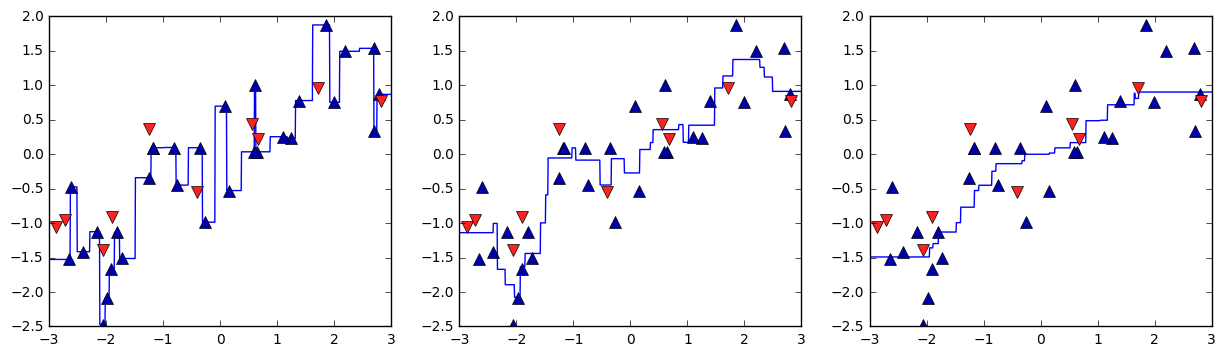

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# 创建1000个数据点，在-3和3之间均匀分布(等差数列)
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

K-NN算法的几个特点总结：

* 易于理解，通常不需要调节什么参数就可以得到不错的性能。
* 在考虑使用高级技术之前，KNN是一种比较好的基准方法。
* 对小数据集的建模速度很快，但如果训练集很大（特征数多或样本多），预测速度会非常慢。
* 使用K-NN算法时对于数据集的预处理极其重要。
* K-NN对多个特征（上百个特征）的数据集建模效果不好。
* 对于大多数取值为0的数据集（系数矩阵）来说，K-NN效果很差。